In [1]:
import os
import clustering
import alignment
import fake_alignment
import cluster_visualization
import template_generating
import stat_calculator

%matplotlib inline

In [2]:
from importlib import reload

In [3]:
fake_alignment = reload(fake_alignment)

In [4]:
from _cluster_file_functions import extract_clusters, record_clusters

In [5]:
SEQUENCE_SOURCE_DIR = 'data_chronic_patients/'  # Folder with sequences
SEQUENCE_SOURCE_NAME = 'chains_exp1_2_1'  # Name of sequences file without extention
OUT_DIR_CLUSTERS = 'data_chronic_patients/Clusters/'  # Folder for clusters
OUT_DIR_VISUALIZATION = 'data_chronic_patients/Paths'  # Folder with graphs
# OUTCOMES_FILE = 'data1/Outcomes.csv'
OUTCOMES_FILE = None
NODE_PARAMETERS_DIR = '_nodes_parameters/chronic_patients'  # File with settings (names_dict.txt is required!!!)
SEQUENCE_SEPARATOR = '\t'  # A separator in SEQUENCE_SOURCE_NAME
encoding = 'cp1251'

In [6]:
# read sequences
sequence_source_path = os.path.join(SEQUENCE_SOURCE_DIR, SEQUENCE_SOURCE_NAME + '.txt')
vectors, cases = extract_clusters(sequence_source_path, eval_=False, header=True,
                                      encoding=encoding, sep=SEQUENCE_SEPARATOR)
vectors = vectors[0]
cases = cases[0]
print(len(vectors), 'sequences')

2112 sequences


In [7]:
OUT_DIR_CLUSTERS += SEQUENCE_SOURCE_NAME + '/'

#### Distance matrix

In [8]:
# filename of distance matrix 
distance_matrix_file = '{0}{1}_similarity_matrix.txt'.format(OUT_DIR_CLUSTERS,
                                                                 SEQUENCE_SOURCE_NAME)

lev_sim_matrix = clustering.get_similarity_matrix(distance_matrix_file, vectors)

0 lines in matrix calculated
1 lines in matrix calculated
2 lines in matrix calculated
3 lines in matrix calculated
4 lines in matrix calculated
5 lines in matrix calculated
6 lines in matrix calculated
7 lines in matrix calculated
8 lines in matrix calculated
9 lines in matrix calculated
10 lines in matrix calculated
11 lines in matrix calculated
12 lines in matrix calculated
13 lines in matrix calculated
14 lines in matrix calculated
15 lines in matrix calculated
16 lines in matrix calculated
17 lines in matrix calculated
18 lines in matrix calculated
19 lines in matrix calculated
20 lines in matrix calculated
21 lines in matrix calculated
22 lines in matrix calculated
23 lines in matrix calculated
24 lines in matrix calculated
25 lines in matrix calculated
26 lines in matrix calculated
27 lines in matrix calculated
28 lines in matrix calculated
29 lines in matrix calculated
30 lines in matrix calculated
31 lines in matrix calculated
32 lines in matrix calculated
33 lines in matrix c

291 lines in matrix calculated
292 lines in matrix calculated
293 lines in matrix calculated
294 lines in matrix calculated
295 lines in matrix calculated
296 lines in matrix calculated
297 lines in matrix calculated
298 lines in matrix calculated
299 lines in matrix calculated
300 lines in matrix calculated
301 lines in matrix calculated
302 lines in matrix calculated
303 lines in matrix calculated
304 lines in matrix calculated
305 lines in matrix calculated
306 lines in matrix calculated
307 lines in matrix calculated
308 lines in matrix calculated
309 lines in matrix calculated
310 lines in matrix calculated
311 lines in matrix calculated
312 lines in matrix calculated
313 lines in matrix calculated
314 lines in matrix calculated
315 lines in matrix calculated
316 lines in matrix calculated
317 lines in matrix calculated
318 lines in matrix calculated
319 lines in matrix calculated
320 lines in matrix calculated
321 lines in matrix calculated
322 lines in matrix calculated
323 line

629 lines in matrix calculated
630 lines in matrix calculated
631 lines in matrix calculated
632 lines in matrix calculated
633 lines in matrix calculated
634 lines in matrix calculated
635 lines in matrix calculated
636 lines in matrix calculated
637 lines in matrix calculated
638 lines in matrix calculated
639 lines in matrix calculated
640 lines in matrix calculated
641 lines in matrix calculated
642 lines in matrix calculated
643 lines in matrix calculated
644 lines in matrix calculated
645 lines in matrix calculated
646 lines in matrix calculated
647 lines in matrix calculated
648 lines in matrix calculated
649 lines in matrix calculated
650 lines in matrix calculated
651 lines in matrix calculated
652 lines in matrix calculated
653 lines in matrix calculated
654 lines in matrix calculated
655 lines in matrix calculated
656 lines in matrix calculated
657 lines in matrix calculated
658 lines in matrix calculated
659 lines in matrix calculated
660 lines in matrix calculated
661 line

971 lines in matrix calculated
972 lines in matrix calculated
973 lines in matrix calculated
974 lines in matrix calculated
975 lines in matrix calculated
976 lines in matrix calculated
977 lines in matrix calculated
978 lines in matrix calculated
979 lines in matrix calculated
980 lines in matrix calculated
981 lines in matrix calculated
982 lines in matrix calculated
983 lines in matrix calculated
984 lines in matrix calculated
985 lines in matrix calculated
986 lines in matrix calculated
987 lines in matrix calculated
988 lines in matrix calculated
989 lines in matrix calculated
990 lines in matrix calculated
991 lines in matrix calculated
992 lines in matrix calculated
993 lines in matrix calculated
994 lines in matrix calculated
995 lines in matrix calculated
996 lines in matrix calculated
997 lines in matrix calculated
998 lines in matrix calculated
999 lines in matrix calculated
1000 lines in matrix calculated
1001 lines in matrix calculated
1002 lines in matrix calculated
1003 

1453 lines in matrix calculated
1454 lines in matrix calculated
1455 lines in matrix calculated
1456 lines in matrix calculated
1457 lines in matrix calculated
1458 lines in matrix calculated
1459 lines in matrix calculated
1460 lines in matrix calculated
1461 lines in matrix calculated
1462 lines in matrix calculated
1463 lines in matrix calculated
1464 lines in matrix calculated
1465 lines in matrix calculated
1466 lines in matrix calculated
1467 lines in matrix calculated
1468 lines in matrix calculated
1469 lines in matrix calculated
1470 lines in matrix calculated
1471 lines in matrix calculated
1472 lines in matrix calculated
1473 lines in matrix calculated
1474 lines in matrix calculated
1475 lines in matrix calculated
1476 lines in matrix calculated
1477 lines in matrix calculated
1478 lines in matrix calculated
1479 lines in matrix calculated
1480 lines in matrix calculated
1481 lines in matrix calculated
1482 lines in matrix calculated
1483 lines in matrix calculated
1484 lin

2011 lines in matrix calculated
2012 lines in matrix calculated
2013 lines in matrix calculated
2014 lines in matrix calculated
2015 lines in matrix calculated
2016 lines in matrix calculated
2017 lines in matrix calculated
2018 lines in matrix calculated
2019 lines in matrix calculated
2020 lines in matrix calculated
2021 lines in matrix calculated
2022 lines in matrix calculated
2023 lines in matrix calculated
2024 lines in matrix calculated
2025 lines in matrix calculated
2026 lines in matrix calculated
2027 lines in matrix calculated
2028 lines in matrix calculated
2029 lines in matrix calculated
2030 lines in matrix calculated
2031 lines in matrix calculated
2032 lines in matrix calculated
2033 lines in matrix calculated
2034 lines in matrix calculated
2035 lines in matrix calculated
2036 lines in matrix calculated
2037 lines in matrix calculated
2038 lines in matrix calculated
2039 lines in matrix calculated
2040 lines in matrix calculated
2041 lines in matrix calculated
2042 lin

In [11]:
MIN_NUM_CLUSTER = 3
MAX_NUM_CLUSTER = 5

3 clusters now
4 clusters now
5 clusters now


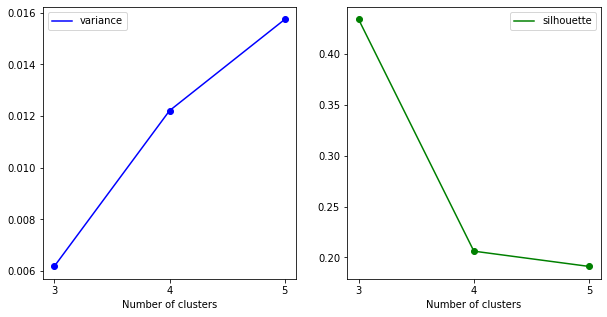

<Figure size 432x288 with 0 Axes>

In [12]:
var_metric, sill_metric = clustering.cluster_in_range(MIN_NUM_CLUSTER, 
                                   MAX_NUM_CLUSTER, 
                                   lev_sim_matrix, 
                                   vectors, 
                                   cases, 
                                   OUT_DIR_CLUSTERS)

clustering.visualize_cluster_metrics(MIN_NUM_CLUSTER, 
                                     OUT_DIR_CLUSTERS, 
                                     [var_metric, sill_metric], 
                                     ['variance', 'silhouette'])


In [13]:
# Choose a number of clusters using metrics above
num_of_clusters = 5

In [14]:
cluster_source = '{}KMeans{}.txt'.format(OUT_DIR_CLUSTERS, num_of_clusters)
clusters, cluster_cases = extract_clusters(cluster_source, eval_=False, sep='\t')

#### Fake aligment

In [15]:
file_alignment = cluster_source.split('.')[0] + '_fake_alignment.txt'
aligned_clusters = [[] for i in range(len(clusters))]
for i, cluster in enumerate(clusters):
    for sequence in cluster:
        aligned_clusters[i].append(fake_alignment.fake_alignment(sequence))

record_clusters(file_alignment, aligned_clusters, cluster_cases, sep='\t')

fake_graphs_append = []
for i, cluster in enumerate(aligned_clusters):
    graph = cluster_visualization.Graph(cluster, 
                                        cluster_cases[i],
                                        cluster_visualization.get_file_name(file_alignment), 
                                        i, 
                                        2,
                                        NODE_PARAMETERS_DIR, 
                                        OUTCOMES_FILE)
    graph.collect_edges()
    fake_graphs_append.append(graph.to_gv(OUT_DIR_VISUALIZATION, 0.00, 0.3))

#### Clusters review

In [16]:
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual

In [17]:
def show_chains_with_clusters(path_with_graphs):
    
    def display_chain(x, width):
        return Image(os.path.join(path_with_graphs, x), width = width, height = 300)
    
    png_graphs = [f for f in os.listdir(path_with_graphs) if f[-3:] == 'png']
    

    x_widget =  widgets.Dropdown(
        options=png_graphs,
        value=png_graphs[0],
        description='Кластер №',
        disabled=False,
    )



    width_slider = widgets.IntSlider(min=100, 
                                     max=1000, 
                                     step=1, 
                                     value=700,
                                    description='Размер:')

    
    interact(display_chain,
             x=x_widget,
             width=width_slider,
            );

In [18]:
path_with_fake_graphs = os.path.split(fake_graphs_append[0])[0]
show_chains_with_clusters(path_with_fake_graphs)

interactive(children=(Dropdown(description='Кластер №', options=('Cluster_0.gv.png', 'Cluster_1.gv.png', 'Clus…

### Statistics 

In [19]:
import pandas as pd
from stat_calculator import cluster_report

In [20]:
cluster_report(cluster_source, file_alignment)

,size,outliers,outliers_%,mean_seq_len
cluster,,,,
0,493,0,0.0,5.01
1,75,0,0.0,14.12
2,491,0,0.0,7.12
3,235,0,0.0,9.73
4,818,0,0.0,5.00
